## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [6]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
y_train.shape

(50000, 10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
opt_SGD = keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt_SGD)

In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 4s 19ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 5.9509 - val_accuracy: 0.5048
Epoch 2/500
196/196 [==============================] - 4s 19ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 5.9529 - val_accuracy: 0.5049
Epoch 3/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 5.9549 - val_accuracy: 0.5047
Epoch 4/500
196/196 [==============================] - 4s 18ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 5.9569 - val_accuracy: 0.5051
Epoch 5/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 5.9588 - val_accuracy: 0.5054
Epoch 6/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 5.9606 - val_accuracy: 0.5050
Epoch 7/500
196/196 [==============================] - 4s 18ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 5.9624 - val_accuracy:

196/196 [==============================] - 3s 18ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.0340 - val_accuracy: 0.5085
Epoch 58/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.0352 - val_accuracy: 0.5084
Epoch 59/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.0365 - val_accuracy: 0.5083
Epoch 60/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.0377 - val_accuracy: 0.5084
Epoch 61/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.0389 - val_accuracy: 0.5084
Epoch 62/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.0401 - val_accuracy: 0.5083
Epoch 63/500
196/196 [==============================] - 5s 24ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.0414 - val_accuracy: 0.508

196/196 [==============================] - 3s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.0967 - val_accuracy: 0.5091
Epoch 114/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.0977 - val_accuracy: 0.5091
Epoch 115/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.0987 - val_accuracy: 0.5092
Epoch 116/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.0997 - val_accuracy: 0.5092
Epoch 117/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.1007 - val_accuracy: 0.5092
Epoch 118/500
196/196 [==============================] - 4s 18ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.1017 - val_accuracy: 0.5091
Epoch 119/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.1027 - val_accuracy:

196/196 [==============================] - 3s 18ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.1502 - val_accuracy: 0.5091
Epoch 170/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.1511 - val_accuracy: 0.5091
Epoch 171/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.1520 - val_accuracy: 0.5091
Epoch 172/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.1529 - val_accuracy: 0.5091
Epoch 173/500
196/196 [==============================] - 4s 18ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.1539 - val_accuracy: 0.5091
Epoch 174/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.1548 - val_accuracy: 0.5091
Epoch 175/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.1557 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.1987 - val_accuracy: 0.5094
Epoch 226/500
196/196 [==============================] - 14s 69ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.1995 - val_accuracy: 0.5094
Epoch 227/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2003 - val_accuracy: 0.5094
Epoch 228/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2011 - val_accuracy: 0.5094
Epoch 229/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2020 - val_accuracy: 0.5094
Epoch 230/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2028 - val_accuracy: 0.5095
Epoch 231/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2036 - val_accuracy

196/196 [==============================] - 3s 17ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2433 - val_accuracy: 0.5093
Epoch 282/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2441 - val_accuracy: 0.5093
Epoch 283/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2448 - val_accuracy: 0.5093
Epoch 284/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2456 - val_accuracy: 0.5093
Epoch 285/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2464 - val_accuracy: 0.5093
Epoch 286/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.2472 - val_accuracy: 0.5093
Epoch 287/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.2479 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.2851 - val_accuracy: 0.5092
Epoch 338/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.2859 - val_accuracy: 0.5092
Epoch 339/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.2866 - val_accuracy: 0.5092
Epoch 340/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.2874 - val_accuracy: 0.5092
Epoch 341/500
196/196 [==============================] - 3s 18ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.2881 - val_accuracy: 0.5092
Epoch 342/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.2888 - val_accuracy: 0.5092
Epoch 343/500
196/196 [==============================] - 3s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.2895 - val_accuracy:

196/196 [==============================] - 3s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3247 - val_accuracy: 0.5096
Epoch 394/500
196/196 [==============================] - 4s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3254 - val_accuracy: 0.5094
Epoch 395/500
196/196 [==============================] - 4s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3260 - val_accuracy: 0.5095
Epoch 396/500
196/196 [==============================] - 4s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3267 - val_accuracy: 0.5097
Epoch 397/500
196/196 [==============================] - 4s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3275 - val_accuracy: 0.5096
Epoch 398/500
196/196 [==============================] - 4s 19ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3282 - val_accuracy: 0.5096
Epoch 399/500
196/196 [==============================] - 4s 19ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3288 - val_accuracy:

196/196 [==============================] - 5s 25ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3621 - val_accuracy: 0.5095
Epoch 450/500
196/196 [==============================] - 5s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3628 - val_accuracy: 0.5094
Epoch 451/500
196/196 [==============================] - 6s 28ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3635 - val_accuracy: 0.5095
Epoch 452/500
196/196 [==============================] - 5s 25ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3641 - val_accuracy: 0.5094
Epoch 453/500
196/196 [==============================] - 4s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3648 - val_accuracy: 0.5094
Epoch 454/500
196/196 [==============================] - 5s 25ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3654 - val_accuracy: 0.5093
Epoch 455/500
196/196 [==============================] - 5s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.3660 - val_accuracy:

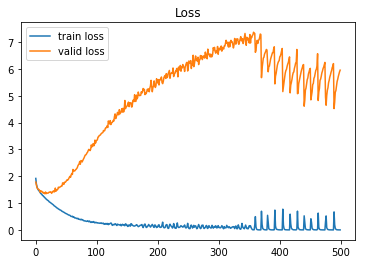

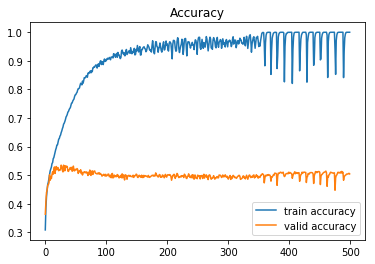

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

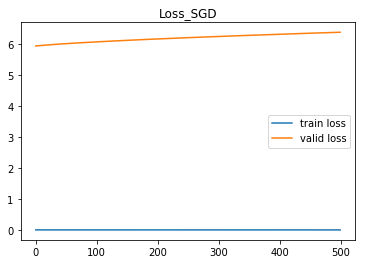

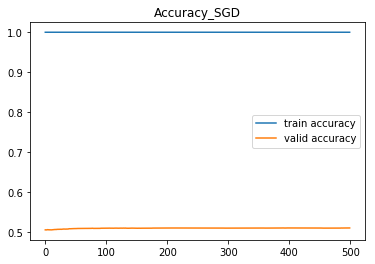

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss_SGD")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy_SGD")
plt.show()